In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data, 
  iris_data.target,
  test_size=0.2,
  random_state=11
)

In [2]:
from sklearn.tree import DecisionTreeClassifier

# 아무런 하이퍼 파라미터 설정을 하지 않았기 때문에, 이 트리는 항상 "과대적합" 트리가 된다.
#   - 결정 트리의 과대적합 : 모든 Leaf Node가 순수 노드(Pure Node)가 되는 상황
# 순수 노드란? 지니 계수가 0인 노드. 즉 모든 데이터가 한 종류만 있는 노드
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Graphviz 시각화
- Tree 모델이 어떻게 학습을 했는지 시각화
- 'conda intall graphviz' 설치 필요(환경변수까지 같이 설정해줌)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt_clf, #시각화 할 모델
    out_file="tree.dot", # 시각화 결과물 파일 경로
    class_names= iris_data.target_names, # 각 클래스의 문자열로 구성된 이름
    feature_names= iris_data.feature_names, # 각 특성으 ㅣ문자열로 구성된 이름
    impurity=True,
    filled = True
)

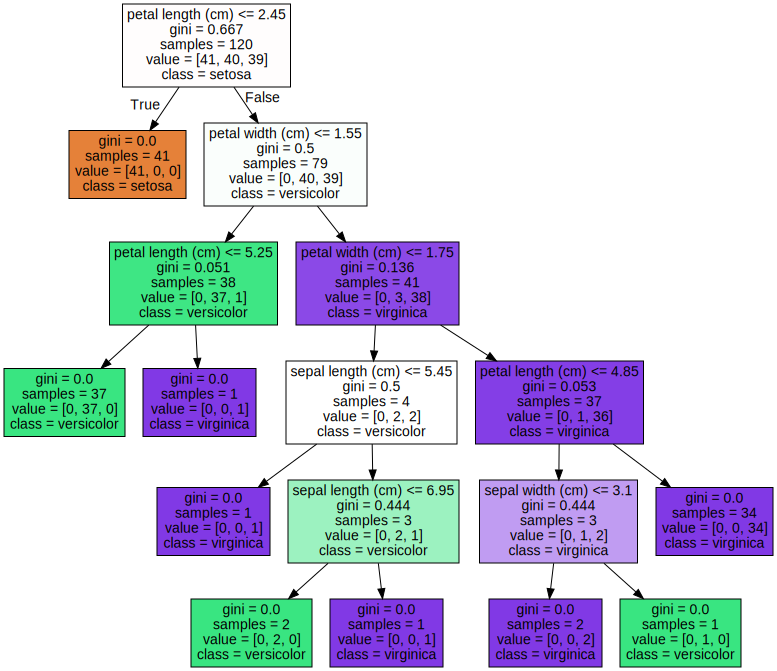

In [5]:
import graphviz
with open("tree.dot") as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

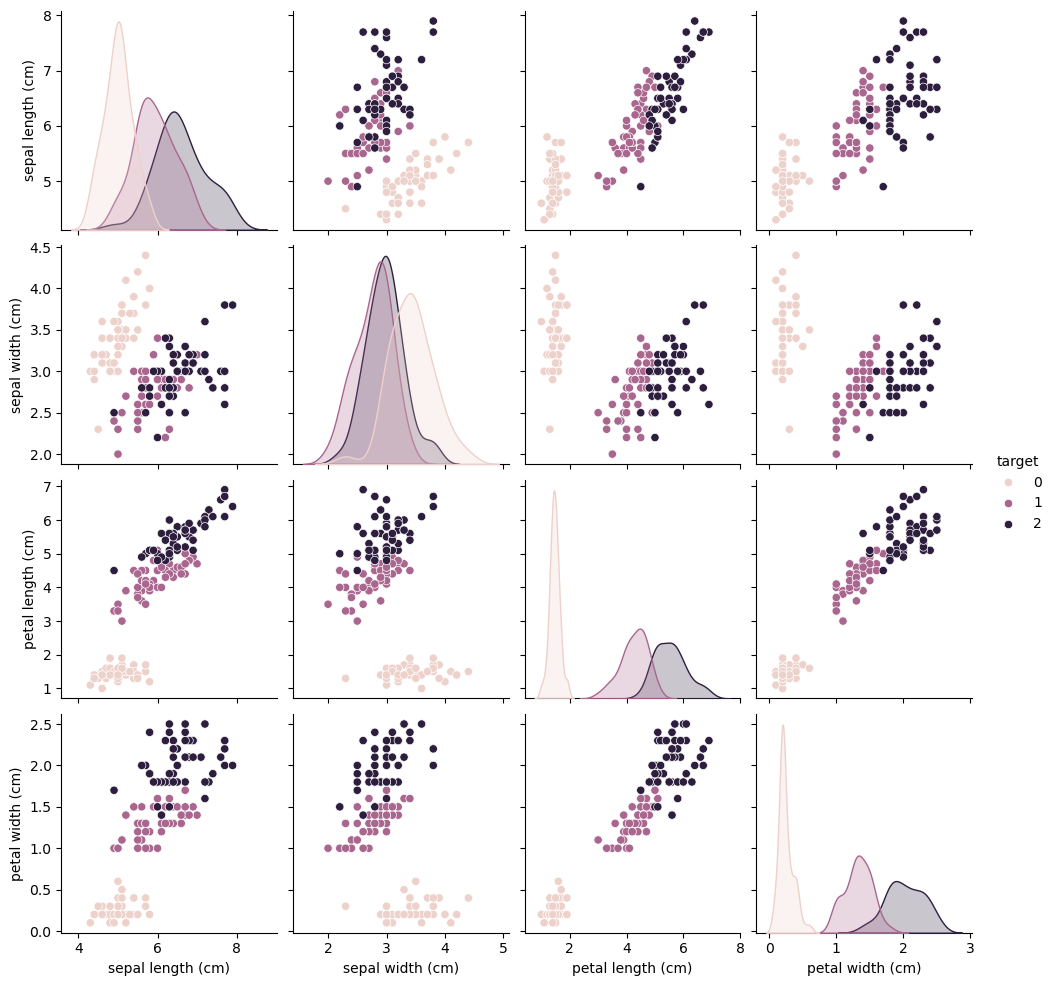

In [6]:
import seaborn as sns
import pandas as pd

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

iris_df.head()

sns.pairplot(
  iris_df, hue='target', height=2.5
)

In [7]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train)
test_pred = dt_clf.predict(X_test)

print("훈련 세트 점수 : {}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트 점수 : {}".format(accuracy_score(y_test, test_pred)))

훈련 세트 점수 : 1.0
테스트 세트 점수 : 0.9333333333333333


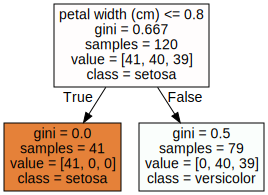

In [11]:
#과소적합 의사결정 트리 만들기
# max_depth = 1로 설정했기 때문에
dt_clf_underfitted = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
export_graphviz(
    dt_clf_underfitted, #시각화 할 모델
    out_file="tree.dot", # 시각화 결과물 파일 경로
    class_names= iris_data.target_names, # 각 클래스의 문자열로 구성된 이름
    feature_names= iris_data.feature_names, # 각 특성으 ㅣ문자열로 구성된 이름
    impurity=True,
    filled = True
)
import graphviz
with open("tree.dot") as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [12]:
train_pred = dt_clf_underfitted.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred  = dt_clf_underfitted.predict(X_test)  # 새로 보는 데이터에 대한 예측

print("훈련 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 0.675
테스트 세트에 대한 점수 : 0.633


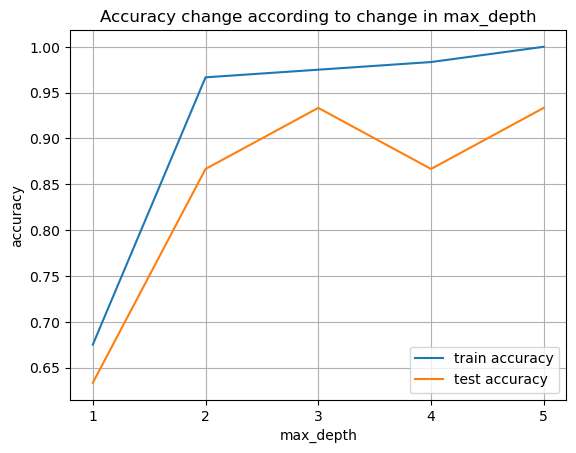

In [15]:
train_accuracy = []
test_accuracy = []

for depth in range(1, 6):
  clf = DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train)
  train_pred = clf.predict(X_train) # 알고 있는 데이터에 대한 예측
  test_pred  = clf.predict(X_test)  # 새로 보는 데이터에 대한 예측

  train_accuracy_score = accuracy_score(y_train, train_pred)
  test_accuracy_score  = accuracy_score(y_test, test_pred)

  train_accuracy.append(train_accuracy_score)
  test_accuracy.append(test_accuracy_score)

plt.plot(train_accuracy, label="train accuracy")
plt.plot(test_accuracy, label="test accuracy")
plt.xticks(range(5), [1, 2, 3, 4, 5])
plt.title("Accuracy change according to change in max_depth")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.grid()
plt.legend()

plt.show()

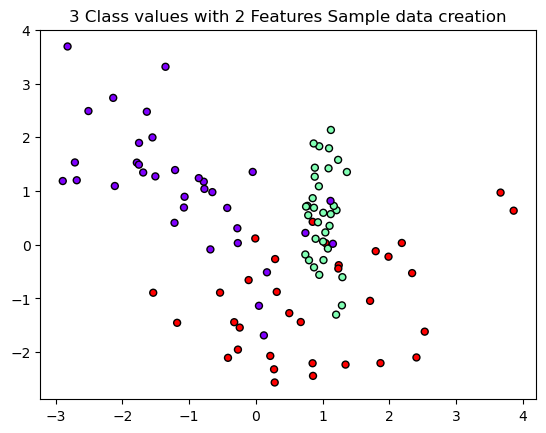

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25,
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

In [17]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\user\AppData\Local\Temp\ipykernel_20100\854302782.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


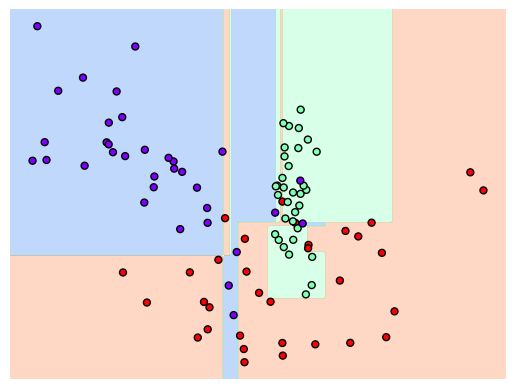

In [18]:
visualize_boundary(dt_clf, X_features, y_labels)

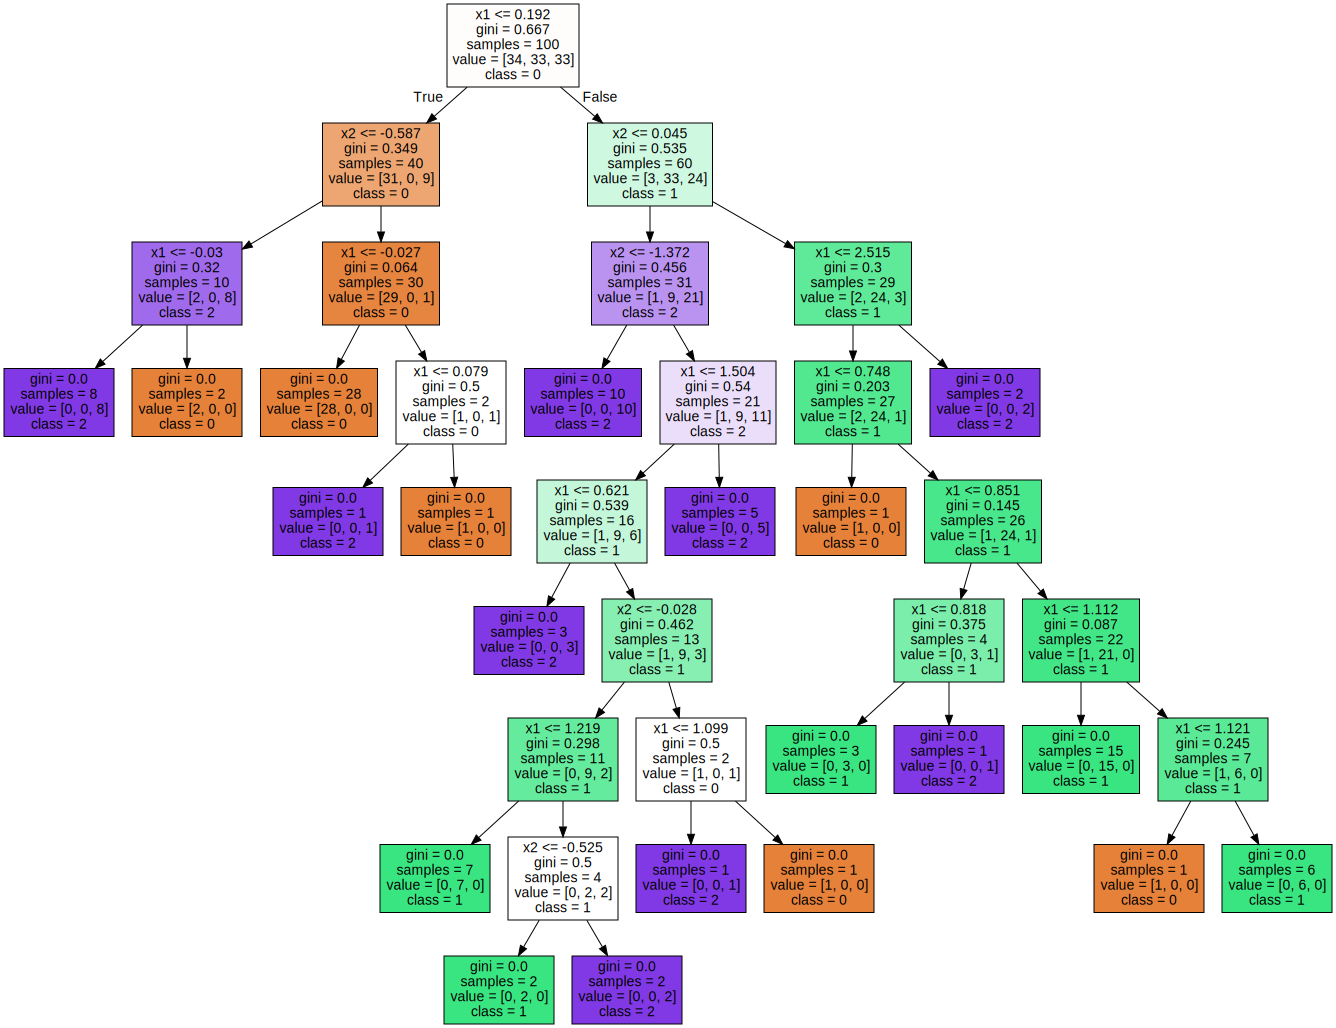

In [19]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

C:\Users\user\AppData\Local\Temp\ipykernel_20100\854302782.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


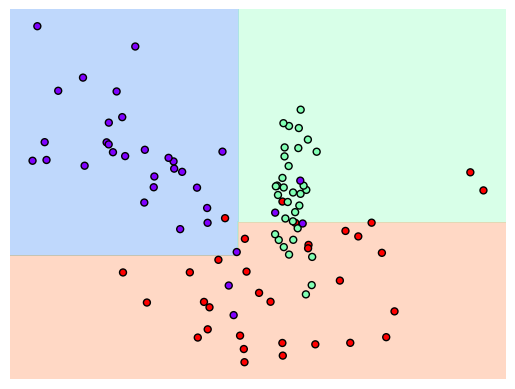

In [28]:
dt_clf = DecisionTreeClassifier(max_depth=2).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

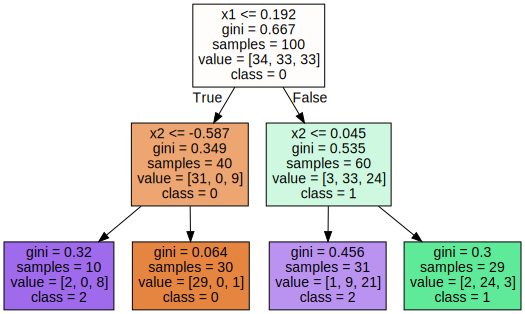

In [29]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

C:\Users\user\AppData\Local\Temp\ipykernel_20100\854302782.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


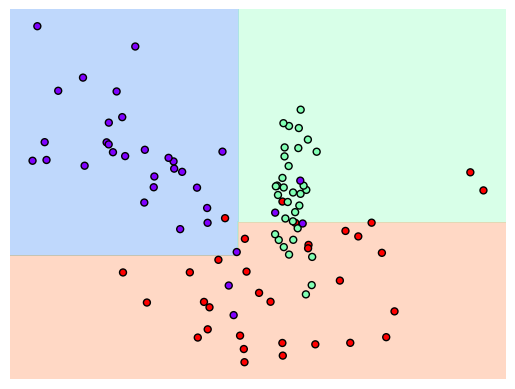

In [30]:
# max_depth
dt_clf = DecisionTreeClassifier(max_depth=2).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

C:\Users\user\AppData\Local\Temp\ipykernel_20100\854302782.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


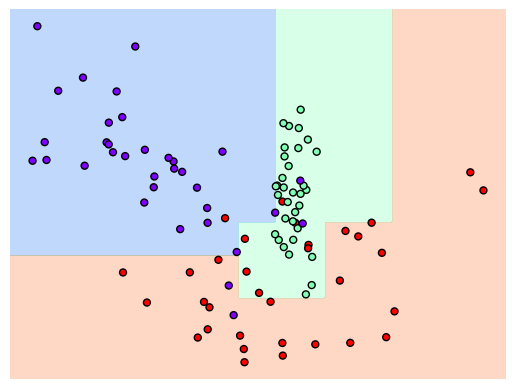

In [31]:
# min_samples_split
dt_clf = DecisionTreeClassifier(min_samples_split=20).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

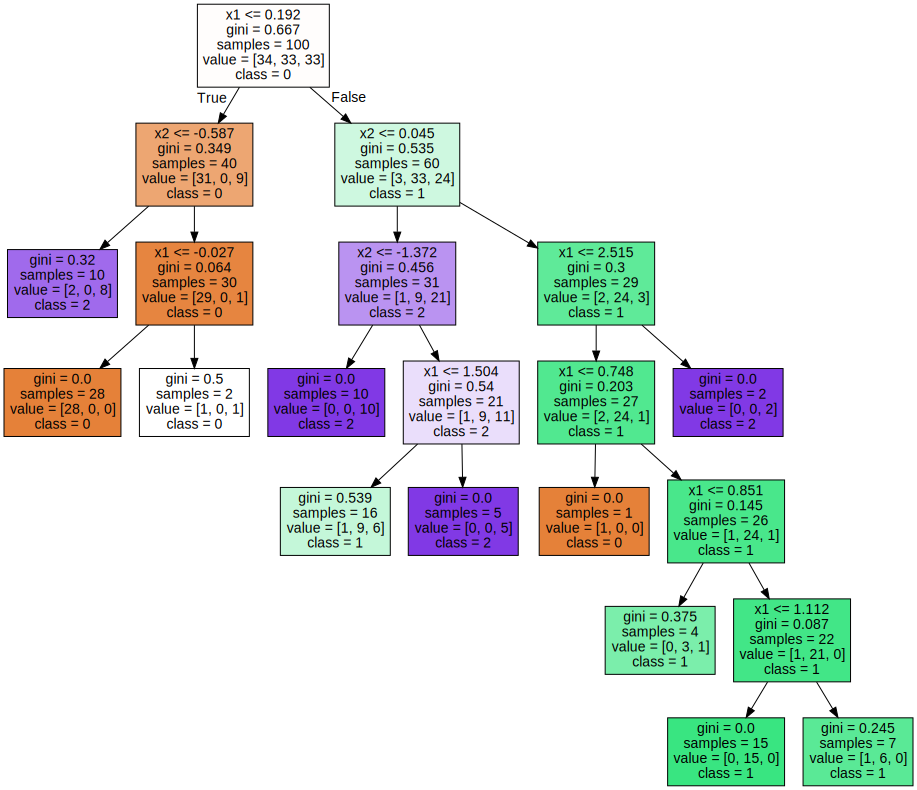

In [32]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

C:\Users\user\AppData\Local\Temp\ipykernel_20100\854302782.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


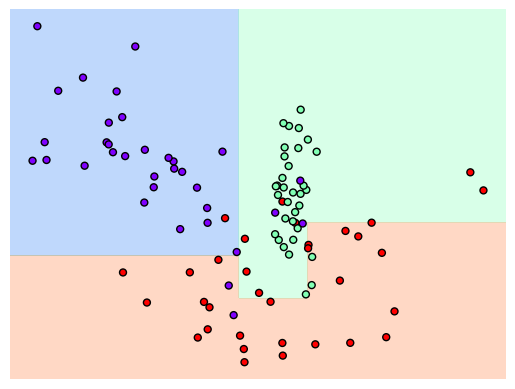

In [34]:
# min_samples_split
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

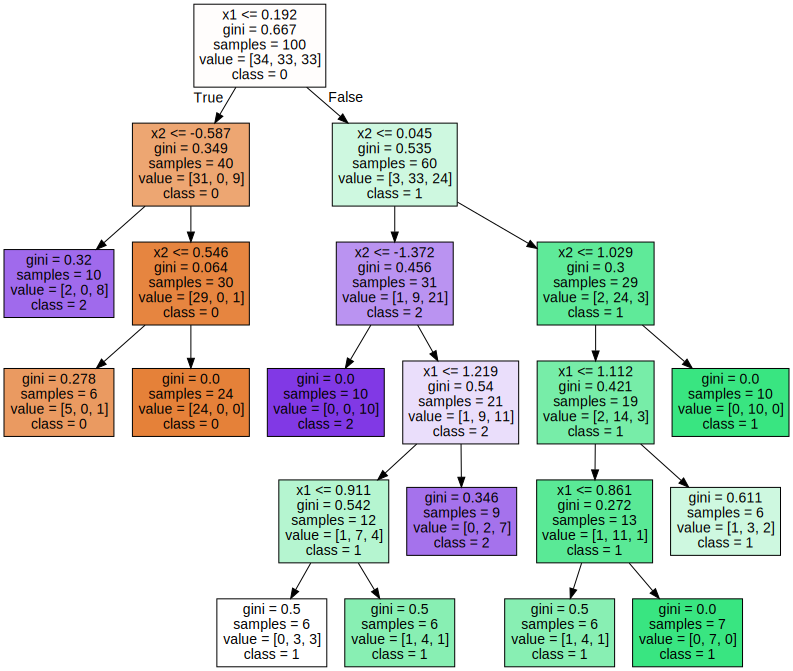

In [35]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=["0", "1", "2"], feature_names=["x1", "x2"], impurity=True, filled=True)
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 특성 중요도(Feature umportance)
- 중요해서 중요도가 아닌, 균일하게 데이터를 잘라내기 적합한 Feature를 확인

In [37]:
dt_clf_iris = DecisionTreeClassifier().fit(X_train, y_train)
dt_clf_iris.feature_importances_

array([0.        , 0.02500521, 0.04867657, 0.92631822])

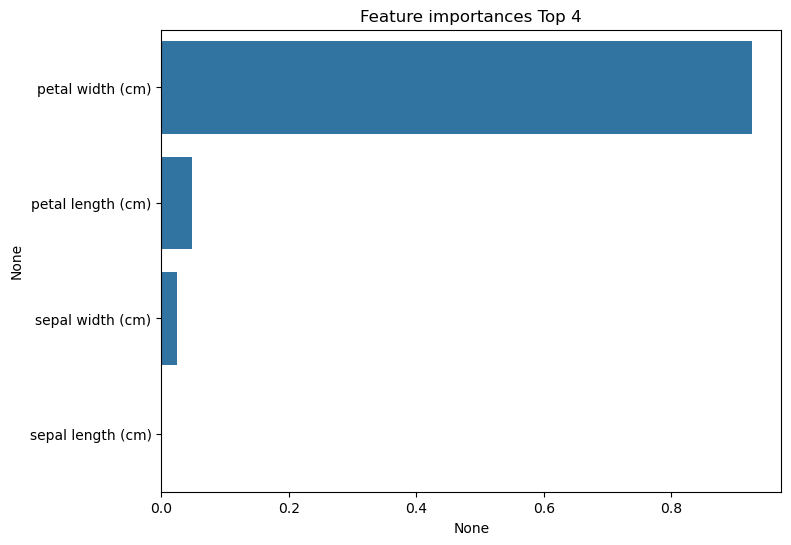

In [38]:
import pandas as pd
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)